<a href="https://colab.research.google.com/github/TakuyaKawachi/gazoubunrui/blob/master/%E7%94%BB%E5%83%8F%E5%8F%8E%E9%9B%86%EF%BC%86%E6%B0%B4%E5%A2%97%E3%81%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 夏期講習　画像判別

### 画像収集

In [1]:
# ライブラリのインストール
!pip install icrawler

In [2]:
# 画像を保存するフォルダに移動
# pathは適宜変える
%cd drive/My Drive/gazoubunrui/original_data
!pwd

/content/drive/My Drive/gazoubunrui/original_data
/content/drive/My Drive/gazoubunrui/original_data


In [4]:
# こんな感じで書く。枚数は、max_numで指定する。
# from icrawler.builtin import BingImageCrawler
# crawler = BingImageCrawler(storage={"root_dir": "フォルダ名"})
# crawler.crawl(keyword="検索キーワード", max_num=20)

from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "saitoasuka"})
crawler.crawl(keyword="齋藤飛鳥", max_num=20)

from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "shiraishimai"})
crawler.crawl(keyword="白石麻衣", max_num=20)

from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "ikutaerika"})
crawler.crawl(keyword="生田絵梨花", max_num=20)

2020-08-26 06:06:38,773 - INFO - icrawler.crawler - start crawling...
2020-08-26 06:06:38,774 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-08-26 06:06:38,779 - INFO - feeder - thread feeder-001 exit
2020-08-26 06:06:38,779 - INFO - icrawler.crawler - starting 1 parser threads...
2020-08-26 06:06:38,787 - INFO - icrawler.crawler - starting 1 downloader threads...
2020-08-26 06:06:39,555 - INFO - parser - parsing result page https://www.bing.com/images/async?q=齋藤飛鳥&first=0
2020-08-26 06:06:40,513 - INFO - downloader - image #1	http://www.twwiki.com/uploads/wiki/1c/7a/724520_0.jpg
2020-08-26 06:06:40,784 - INFO - downloader - image #2	https://i.pinimg.com/originals/47/ec/0c/47ec0cb3c4cfbffeb9bda303244d1d2a.jpg
2020-08-26 06:06:41,137 - INFO - downloader - image #3	https://i.pinimg.com/originals/97/bb/69/97bb69b9602326e05264645d965a0138.jpg
2020-08-26 06:06:42,200 - INFO - downloader - image #4	http://i.imgur.com/9HvXX20.jpg
2020-08-26 06:06:42,367 - INFO - downloader - im

### 画像水増し

In [5]:
%matplotlib inline


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import numpy as np
import os


X_train=[]
Y_train=[]

X_test=[]
Y_test=[]

Mydrive = "/content/drive/My Drive/gazoubunrui"

l=os.listdir(Mydrive + "/original_data")



saitoasuka
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000001.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000002.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000003.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000005.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000007.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000008.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000009.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000011.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000012.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000013.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000014.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000015.jpg
/content/drive/My Drive/gazoubunrui/original_data/saitoasuka/000016.jpg
/content/drive/My Drive/gazoubunrui/original_data/sa

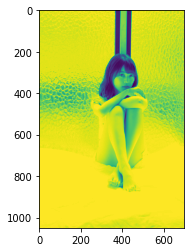

In [10]:
cascade_path = Mydrive + '/haarcascade_frontalface_alt.xml'

for i in l:
    result_dir=i.split(".")[0]
    print(result_dir)
    # os.mkdir(Mydrive + "/face/"+result_dir)
    os.makedirs(Mydrive + "/face/"+result_dir, exist_ok=True)

    m=os.listdir(Mydrive + "/original_data/"+i)
    n=0
    for target_file in m:
        original_data=(Mydrive + "/original_data/"+i+"/"+target_file)
        print(original_data)
        cascade=cv2.CascadeClassifier(cascade_path)
        image=cv2.imread(original_data)

        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        plt.imshow(gray)

        facerect=cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=1,minSize=(10,10))

        for x,y,w,h in facerect:
            face=gray[y:y+h,x:x+w]
            face=cv2.resize(face,(128,128))
            save_path=Mydrive + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.flip(face,1)
            save_path=Mydrive + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(face,(10,10))
            save_path=Mydrive + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(cv2.flip(face,1),(10,10))
            save_path=Mydrive + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1